<a href="https://colab.research.google.com/github/parindapannoon/API-Copernicus/blob/main/APICopernicusNetCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12021 sha256=4539169ebba2de353c574e3d8e0f83adf26389bd265980f6399677508cccdfa1
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


In [2]:
#please register at the CDS registration page so you get a key
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key= '190275:b8fd6953-5f28-4d39-a1b1-82f025b73e63'

In [3]:
#get API request from the dataset
import cdsapi

c = cdsapi.Client(url = 'https://cds.climate.copernicus.eu/api/v2',
key= '190275:b8fd6953-5f28-4d39-a1b1-82f025b73e63')

c.retrieve(
    'cems-fire-historical',
    {
        'format': 'zip',
        'product_type': 'reanalysis',
        'variable': 'fire_weather_index',
        'version': '4.0',
        'dataset': 'Consolidated dataset',
        'year': [
            '2014', '2022',
        ],
        'month': '04',
        'day': [
            '10', '16', '20',
        ],
    },
    '/content/download.zip')

2023-04-30 12:40:11,976 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-04-30 12:40:11,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-fire-historical
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-fire-historical
2023-04-30 12:40:12,350 INFO Request is completed
INFO:cdsapi:Request is completed
2023-04-30 12:40:12,352 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-cems-fire-historical-1f950f53-c873-4441-9349-3c3b8e4a4651.zip to /content/download.zip (4.1M)
INFO:cdsapi:Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-cems-fire-historical-1f950f53-c873-4441-9349-3c3b8e4a4651.zip to /content/download.zip (4.1M)
2023-04-30 12:40:14,272 INFO Download rate 2.1M/s
INFO:cdsapi:Download rate 2.1M/s


Result(content_length=4279807,content_type=application/zip,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-cems-fire-historical-1f950f53-c873-4441-9349-3c3b8e4a4651.zip)

In [4]:
import zipfile
with zipfile.ZipFile("/content/download.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [6]:
f = xr.open_dataset('/content/ECMWF_FWI_FWI_20140410_1200_hr_v4.0_con.nc')


In [7]:
f

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 2014-04-10T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    fwi        (time, latitude, longitude) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.8 (https://...
    Conventions:               CF-1.6
    history:                   Sat Jul 31 11:52:43 2021: cdo -f nc4 -chname,f...
    institution:               European Centre for Medium-Range Weather Forec...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 1.9.8 (https://...

In [8]:
# General info on the data 
f.info

# Get the list of variables
f.data_vars

# Get the list of dimensions
f.coords

# Get info on one specific variable (here thetao)
f.fwi

# Get info on dimensions 
f.time, f.latitude, f.longitude

(<xarray.DataArray 'time' (time: 1)>
 array(['2014-04-10T12:00:00.000000000'], dtype='datetime64[ns]')
 Coordinates:
   * time     (time) datetime64[ns] 2014-04-10T12:00:00
 Attributes:
     standard_name:  time
     axis:           T,
 <xarray.DataArray 'latitude' (latitude: 721)>
 array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'longitude' (longitude: 1440)>
 array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
        3.5975e+02], dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
 Attributes:
     standard_name:  longitude
     long_name:      longitude
     units:          degrees_east
     axis:           X)

In [9]:
subset = f['fwi'].sel(time = slice("2014-04-10"))
subset

<xarray.DataArray 'fwi' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2014-04-10T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Attributes:
    standard_name:  forest_fire_weather_index
    long_name:      Forest fire weather index
    units:          Numeric
    param:          5.4.2
    institution:    ECMWF

In [10]:
f.coords

Coordinates:
  * time       (time) datetime64[ns] 2014-04-10T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

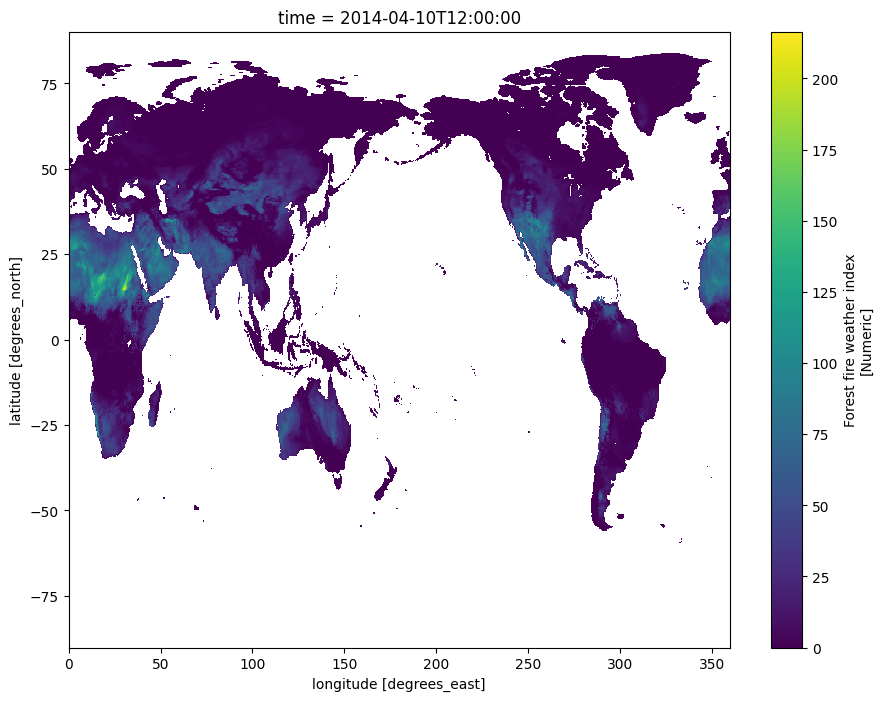

In [11]:
## Plot 
subset.plot(size = 8)

plt.show()

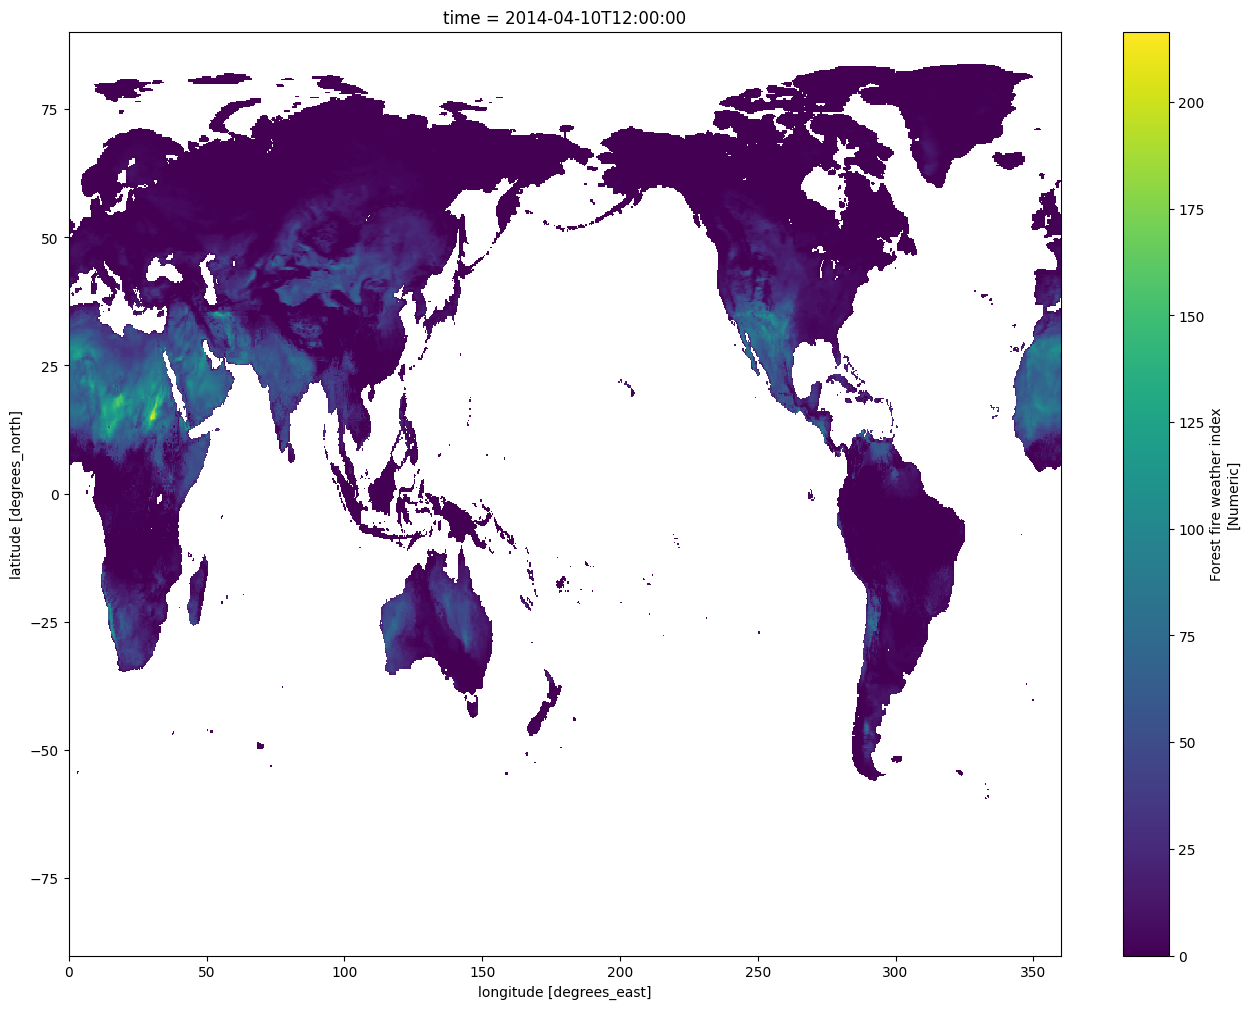

In [12]:
f.fwi.plot(size=12) #another way to plot

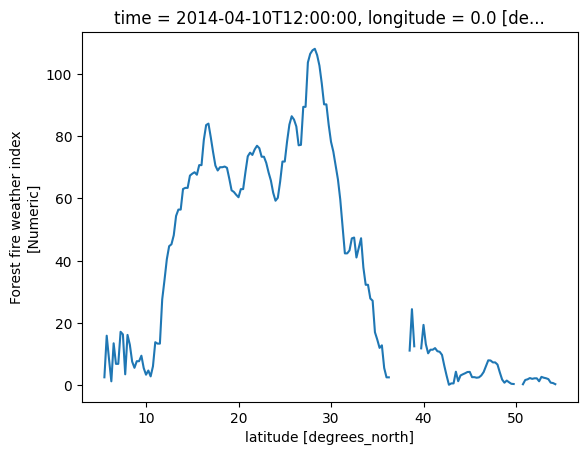

In [13]:
f.isel(time=0).sel(longitude=-59, method='nearest').fwi.plot()

In [14]:
f.fwi.mean()

<xarray.DataArray 'fwi' ()>
array(14.251976, dtype=float32)

In [15]:
meanfwi = f.fwi.mean(dim='time')
meanfwi

<xarray.DataArray 'fwi' (latitude: 721, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

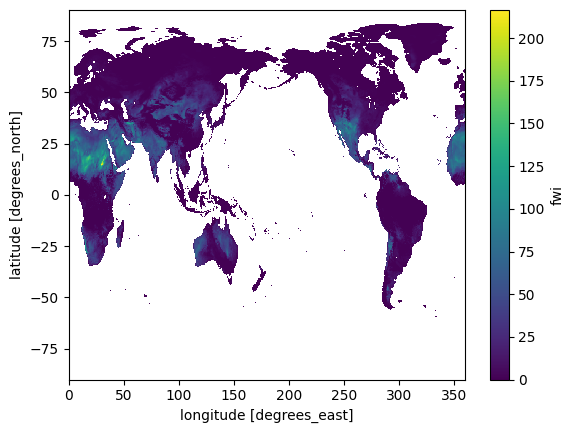

In [16]:
meanfwi.plot()

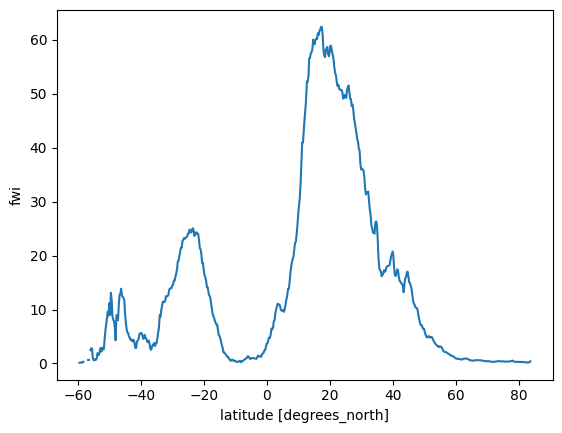

In [17]:
(f.fwi.mean(dim=['time', 'longitude'])).plot()

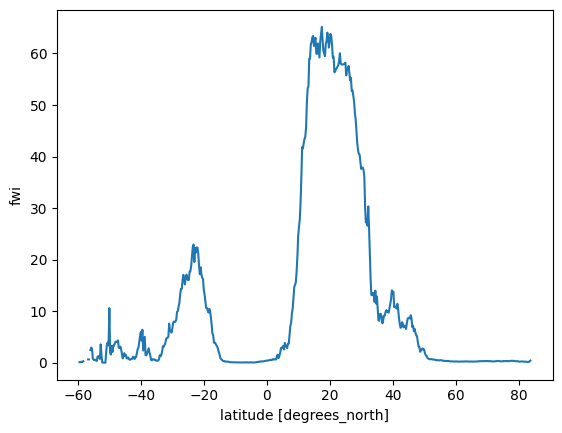

In [18]:
(f.fwi.median(dim=['time', 'longitude'])).plot()